Groupe:
Olivia Blattmann,
Thomas Peze,
Pauline Tellier

Nous avons décidé de prendre une base de données Allociné. Ce dataset contient le commentaire de l'utilisateur puis la note. La note peut aller de 0.5 à 5, par pas de 0.5. Nous faisons donc face à des données de différentes classes (multi-classe), il faut donc adapter le code par rapport à celui du cours qui était binaire.

Nous avons commencé par visualiser les données, puis diminuer l'ensemble afin de pouvoir lancer les calculs plus facilement. En prenant un échantillon réduit, nous avons vu que la répartition des notes étaient identiques donc cela ne faussera pas nos résultats d'exploitation.

Puis nous nettoyons la base de données. Nous avons créé une nouvelle colonne avec les valeurs nettoyées.
Nous appliquons ensuite le Word2Vec et la similarité des cosinus. Nous créeons nos liste de mots en utilisant ces fonctions. Par la suite, nous pouvons par la suite lancer nos modèles sur la colonne des notes ainsi que sur celle des commentaires nettoyés afin d'en déduire le plus perfomant. Nous créeons un document pickle où on stocke nos valeurs. Ensuite, nous utilisons la méthode de train_test_split pour l'apprentissage supervisé. Pour finir, nous utilisons la méthode de Batch afin de déterminer le meilleur modèle en changeant le modèle séquentiel ainsi que le nombre d'époques. (conclusion à la fin)

# Analyse des commentaires Allociné

#### https://github.com/erwan29880/analyse-de-sentiments/blob/main/data_total.csv

In [1]:
import json
import pandas as pd
import string
from nltk.tokenize import TweetTokenizer
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Charger les données
comments = pd.read_csv('data_total_allociné.csv')
comments.rename(columns={'Unnamed: 0': 'commentaire','0': 'note'}, inplace=True)
comments.head(5)

,commentaire,note
0,film très lent plutôt hermétique est une oeuv...,2.0
1,faut voir genre film pour croire ils existent...,3.0
2,des acteurs français jouant les américains ba...,0.5
3,livre boris vian tourné film dans les années ...,5.0
4,irai cracher est sans doute œuvre française p...,1.0


In [3]:
comments.tail() 

,commentaire,note
49020,mais est dallas avant lettre univers impitoya...,3.0
49021,ne faut pas séparer soif la jeunesse groupe d...,5.0
49022,après cinq ans bons loyaux services chez nick...,2.5
49023,film trop nul c est presque compliment tellem...,0.5
49024,ne connaissais pas série télé donc ne connais...,0.5


In [4]:
comments.note.value_counts() 

note
5.0    17122
4.0     6909
0.5     5694
4.5     4757
2.5     3112
1.0     3076
3.0     2783
3.5     2570
2.0     2020
1.5      982
Name: count, dtype: int64

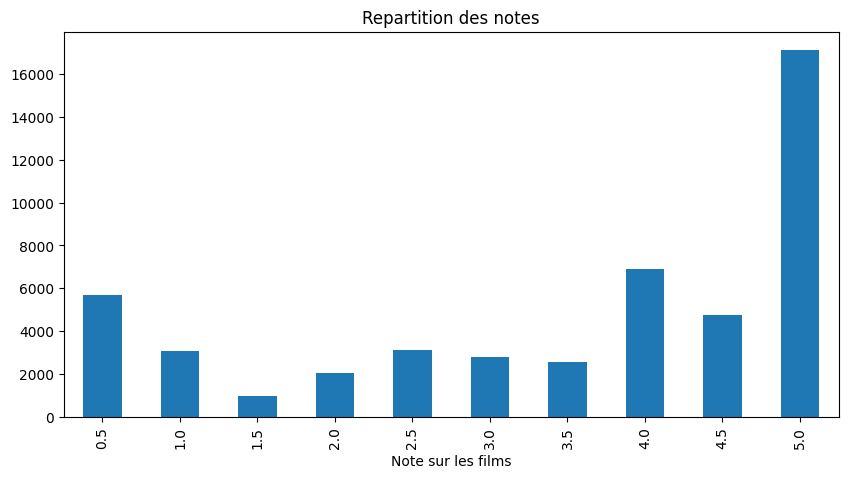

In [5]:
#Graphique montrant la répartition totale des notes 

ax = comments['note'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Repartition des notes',
          figsize=(10, 5))
ax.set_xlabel("Note sur les films")
plt.show()

### Nettoyage

In [6]:
with open('stopwords-fr.json', encoding = "utf-8") as json_file :
    stop_words = json.load(json_file)

tokenizer = TweetTokenizer()
stop_words.extend(['...',"j'ai","c'est",'..', '!!!', '&'])

def process_comments(com) :
    #regular expression
    com1 = re.sub(r'^RT[\s]+','', com)
    com2 = re.sub(r'https?:\/\/.*[\r\n]*','', com1)
    com3 = re.sub(r'#', '', com2)
    #tokenization
    comment_mots = tokenizer.tokenize(com3)
    #stop words
    comments_clean = [word for word in comment_mots if word not in stop_words and word not in string.punctuation]

    return comments_clean

In [7]:
comments.iloc[10,][0]

C:\Users\olivi\AppData\Local\Temp\ipykernel_54528\2431220291.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comments.iloc[10,][0]


' irai cracher sur vos tombes est assez bon film mais une très mauvaise adaptation roman culte boris vian écrit sous pseudonyme vernon sullivan film lui un scénario qui tient peu près une bonne ambiance film noir années la française les acteurs jouent assez bien christian marquand compose avec certain savoir faire personnage métisse qui cherche se venger daniel cauchy est hilarant dans son rôle petit voyou les décors eux sont assez fidèles livre mais ne croit vraiment pas aux usa ce qui concerne adaptation elle avérait risquée raison des nombreuses scènes sexe de violence bouquin boris vian avait fait scénario mais michel gast ses acolytes ont refait scénario leur manière ça donne personnage qui appelait initialement lee anderson devient joe grant non seulement son nom change mais aussi son caractère effet dans film haine personnage est atténué pour il devienne politiquement correct du coup celui ne pas bout sa vengeance donc toute histoire est chamboulée bref film voir mais pas comme 

In [8]:
process_comments(comments.iloc[10,][0])

C:\Users\olivi\AppData\Local\Temp\ipykernel_54528\4051011018.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  process_comments(comments.iloc[10,][0])


['irai',
 'cracher',
 'tombes',
 'film',
 'mauvaise',
 'adaptation',
 'roman',
 'culte',
 'boris',
 'vian',
 'écrit',
 'pseudonyme',
 'vernon',
 'sullivan',
 'film',
 'scénario',
 'tient',
 'bonne',
 'ambiance',
 'film',
 'noir',
 'années',
 'française',
 'acteurs',
 'jouent',
 'christian',
 'marquand',
 'compose',
 'savoir',
 'faire',
 'personnage',
 'métisse',
 'cherche',
 'venger',
 'daniel',
 'cauchy',
 'hilarant',
 'rôle',
 'petit',
 'voyou',
 'décors',
 'fidèles',
 'livre',
 'croit',
 'vraiment',
 'usa',
 'concerne',
 'adaptation',
 'avérait',
 'risquée',
 'raison',
 'scènes',
 'sexe',
 'violence',
 'bouquin',
 'boris',
 'vian',
 'scénario',
 'michel',
 'gast',
 'acolytes',
 'refait',
 'scénario',
 'manière',
 'donne',
 'personnage',
 'appelait',
 'initialement',
 'lee',
 'anderson',
 'devient',
 'joe',
 'grant',
 'nom',
 'change',
 'caractère',
 'film',
 'haine',
 'personnage',
 'atténué',
 'devienne',
 'politiquement',
 'correct',
 'coup',
 'bout',
 'vengeance',
 'histoire',
 '

In [10]:
#on n'en prend 500 pour que le chargement ne soit pas trop long
comments_sample = comments.sample(500)

In [11]:
comments_sample.note.value_counts()

note
5.0    151
4.0     80
0.5     75
4.5     50
2.5     36
1.0     31
2.0     29
3.0     21
3.5     18
1.5      9
Name: count, dtype: int64

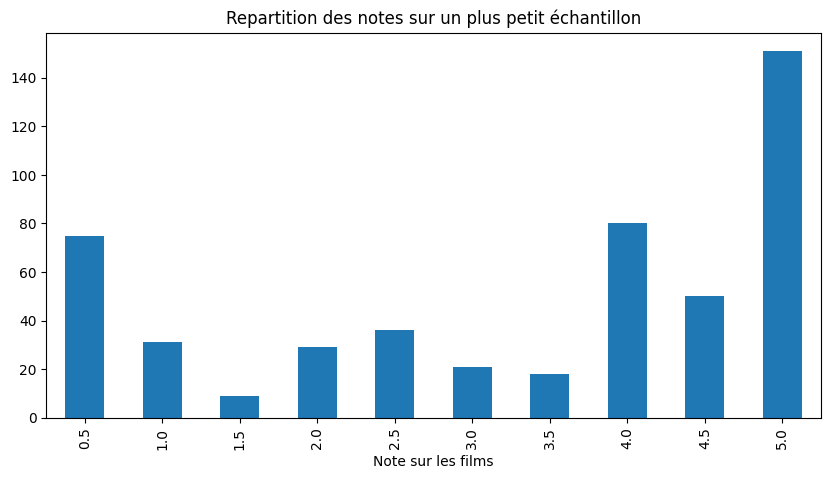

In [12]:
#Graphique qui montre la repartition des notes de l'echantillon

ax = comments_sample['note'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Repartition des notes sur un plus petit échantillon',
          figsize=(10, 5))
ax.set_xlabel("Note sur les films")
plt.show()  
#on voit que la repartition sur notre échantillon est presque identique à la repartition totale du fichier

In [13]:
comments.head()

,commentaire,note
0,film très lent plutôt hermétique est une oeuv...,2.0
1,faut voir genre film pour croire ils existent...,3.0
2,des acteurs français jouant les américains ba...,0.5
3,livre boris vian tourné film dans les années ...,5.0
4,irai cracher est sans doute œuvre française p...,1.0


In [14]:
#on ajoute une colone de commentaires nettoyés
comments_sample['Clean_com'] = comments_sample['commentaire'].apply(lambda comm:process_comments(comm))


In [15]:
comments_sample.head()

,commentaire,note,Clean_com
11436,remake qui sera avant tout bel hommage visuel...,2.5,"[remake, bel, hommage, visuel, vibrant, anglet..."
11895,film fantastic la hauteur ses ambitions casti...,4.0,"[film, fantastic, hauteur, ambitions, casting,..."
35568,est fou pensais lire uniquement des commentai...,5.0,"[fou, pensais, lire, uniquement, commentaires,..."
8364,phénoménal exceptonelle joli prodigieux spect...,5.0,"[phénoménal, exceptonelle, joli, prodigieux, s..."
46169,honnêtement film tres suprenant des effets sp...,5.0,"[honnêtement, film, suprenant, effets, spéciau..."


### Application Word2vec

In [16]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("frWac_postag_no_phrase_700_skip_cut50.bin", binary = True, unicode_errors="ignore")

In [17]:
list(model.key_to_index)[:10] #afficher la liste des 10 premiers mots
#les _ noté après disent si c'est un adverbe, adjectif, nom...

['</s>',
 'le_d',
 'de_p',
 'et_c',
 'de_p+d',
 'un_d',
 'être_v',
 'à_p',
 'son_d',
 'en_p']

### Similarité du cosinus

In [18]:
import numpy as np

#cos(u,v) = (u*v)/(||u||*||v||)

def cosine_similar(u, v) :
    distance = 0.0
    pdt = np.dot(u,v) #multiplication entre 2 vecteurs
    norm_u = np.sqrt(sum(u**2))
    norm_v = np.sqrt(sum(v**2))

    cos_sim = pdt/(norm_u*norm_v)
    return cos_sim

### Analogie Word2vec

In [19]:
def affiche_datarame(obj) :
    print(pd.DataFrame(obj))

def analogy(worda, wordb, wordc) :
    result = model.most_similar(negative= [worda], positive= [wordb, wordc])
    return result[0][0]


In [20]:
from nltk import FreqDist

def Bag_of_words(ListofCom) :
    all_words = []
    for m in ListofCom :
        for w in m : 
            all_words.append(w.lower())
    all_words = FreqDist(all_words)

    return all_words

sac_de_mots = Bag_of_words(comments_sample['Clean_com'])

In [21]:
print(sac_de_mots.most_common())

[('film', 820), ('scénario', 127), ('vraiment', 121), ('voir', 119), ('histoire', 116), ('acteurs', 111), ('faire', 104), ('fin', 101), ('films', 85), ('star', 81), ('wars', 78), ('cinéma', 74), ('effets', 73), ('nolan', 70), ('mal', 68), ('spéciaux', 65), ('personnages', 60), ('grand', 59), ('scènes', 56), ('humour', 54), ('scène', 53), ('chef', 52), ('épisode', 50), ('saga', 49), ('rôle', 49), ('mieux', 48), ('faut', 47), ('bref', 44), ('chose', 43), ('personnage', 42), ('oeuvre', 42), ('magnifique', 40), ('temps', 40), ('jamais', 39), ('réalisateur', 39), ('inception', 39), ('final', 38), ('musique', 37), ('meilleur', 37), ('moment', 37), ('casting', 36), ('action', 36), ('univers', 36), ('long', 35), ('luke', 35), ('réussi', 34), ('mauvais', 34), ('monde', 34), ('bonne', 33), ('trilogie', 33), ('excellent', 32), ('point', 32), ('rêves', 31), ('déjà', 31), ('belle', 30), ('œuvre', 30), ('comprendre', 30), ('côté', 30), ('passer', 30), ('décors', 29), ('livre', 29), ('pourtant', 29),

In [22]:
mots_in_my_dict = {}
words = list(model.key_to_index)

for i,k in sac_de_mots.items() :
    string_with_substring = [string for string in words if i in string.split("_")]

    if len(string_with_substring) > 0 :
        mots_in_my_dict[string_with_substring[0]] = model[string_with_substring[0]]

In [23]:
len(mots_in_my_dict)

4745

In [24]:
mots_in_my_dict.keys()

dict_keys(['remake_n', 'bel_n', 'hommage_n', 'visuel_a', 'vibrant_a', 'angleterre_n', 'campagnes_n', 'brumes_n', 'landes_n', 'brume_n', 'presque_adv', 'factice_a', 'monstre_n', 'clairement_adv', 'inspiré_n', 'saura_n', 'repousser_v', 'belle_n', 'intro_n', 'classieuse_adv', 'superbe_a', 'johnston_n', 'réalisation_n', 'ample_a', 'jouant_n', 'parfaitement_adv', 'magnifiques_n', 'décors_n', 'musique_n', 'également_adv', 'adéquat_a', 'film_n', 'hollywoodien_a', 'vraiment_adv', 'suggestif_a', 'scènes_n', 'transformation_n', 'détaillée_n', 'prouve_n', 'hideux_a', 'loup_n', 'garou_n', 'paris_n', 'numériques_et', 'avérer_v', 'extrêmement_adv', 'photo_n', 'donne_n', 'impression_n', 'vieux_a', 'technicolor_n', 'délicat_a', 'redonner_v', 'naissance_n', 'mythe_n', 'connaitre_adv', 'scénario_n', 'longue_n', 'partie_n', 'spectateurs_n', 'avance_n', 'rapport_n', 'histoire_n', 'manque_n', 'frousse_n', 'personnages_n', 'adéquation_n', 'folie_n', 'hopkins_n', 'extraordinaire_a', 'personnage_n', 'ambigu_a

### Modèle

In [25]:
import glob
import pickle
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [26]:
ListNote = list(comments_sample['note'])
Clean_com = list(comments_sample['Clean_com'])
Documents=[]
for i in range(len(ListNote)-1):
    Documents.append((Clean_com[i],ListNote[i]))

In [27]:
# Load Pickle
import pickle
with open('Documents_note.pkl','wb') as f : #write
    pickle.dump(Documents, f)

In [28]:
print(Documents[0])

(['remake', 'bel', 'hommage', 'visuel', 'vibrant', 'angleterre', 'victorienne', 'campagnes', 'brumes', 'landes', 'brume', 'presque', 'factice', 'monstre', 'clairement', 'inspiré', 'saura', 'repousser', 'avertis', 'belle', 'intro', 'classieuse', 'superbe', 'johnston', 'révèle', 'réalisation', 'ample', 'voluptueuse', 'jouant', 'parfaitement', 'symétries', 'magnifiques', 'décors', 'musique', 'également', 'hommage', 'adéquat', 'film', 'hollywoodien', 'vraiment', 'suggestif', 'scènes', 'abominations', 'commises', 'monstre', 'transformation', 'détaillée', 'prouve', 'hideux', 'loup', 'garou', 'paris', 'numériques', 'avérer', 'extrêmement', 'impressionnants', 'photo', 'donne', 'impression', 'vieux', 'technicolor', 'délicat', 'redonner', 'naissance', 'mythe', 'connaitre', 'scénario', 'ronronne', 'longue', 'partie', 'spectateurs', 'avance', 'rapport', 'histoire', 'manque', 'frousse', 'personnages', 'adéquation', 'folie', 'ambiante', 'hopkins', 'extraordinaire', 'personnage', 'ambigu', 'habitude'

In [29]:
import pickle
with open('Documents_note.pkl','rb') as f : #read
    Documents = pickle.load(f)

In [30]:
len(Documents)

499

In [31]:
def get_Max_Min_length_Sent():
    Max = 0
    Min = 10
    CountInf10 = 0
    CountSup10 = 0
    CountSup20 = 0
    CountSup30 = 0
    CountSup40 = 0
    CountSup50 = 0
    CountSup100 = 0
    CountSup150 = 0
    CountSup200 = 0
    CountSup250 = 0
    CountSup300 = 0
    CountSup400 = 0
    CountSup500 = 0
    CountSup1000 = 0
    
    for S,t in Documents:
        if len(S) > Max:
            Max = len(S)
        if len(S) < Min :
            Min = len(S)
        if len(S) < 10:
            CountInf10 +=1
        if len(S) > 10:
            CountSup10 +=1
        if len(S) >20 :
            CountSup20 +=1
        if len(S) >30 :
            CountSup30 +=1
        if len(S) >40 :
            CountSup40 +=1
        if len(S) > 50:
            CountSup50 +=1
        if len(S) > 100:
            CountSup100 +=1
        if len(S) > 150:
            CountSup150 +=1
        if len(S) > 200:
            CountSup200 +=1
        if len(S) > 250:
            CountSup250 +=1
        if len(S) > 300:
            CountSup300 +=1
        if len(S) > 400:
            CountSup400 +=1
        if len(S) > 500:
            CountSup500 +=1
        if len(S) > 1000:
            CountSup1000 +=1
        
        
            
    return Max,Min,CountInf10, CountSup10, CountSup20, CountSup30, CountSup40, CountSup50,CountSup100, CountSup150, CountSup200, CountSup250, CountSup300, CountSup400, CountSup500, CountSup1000

Max,Min,CountInf10, CountSup10, CountSup20, CountSup30, CountSup40, CountSup50,CountSup100, CountSup150, CountSup200, CountSup250, CountSup300, CountSup400, CountSup500, CountSup1000 = get_Max_Min_length_Sent()
print("Max length sentence is :",Max,"Min length sentence is :",Min)
print("Sentence with less than 10 word ",CountInf10)
print("Sentence with more than 10 word ",CountSup10)
print("Sentence with more than 20 word ",CountSup20)
print("Sentence with more than 30 word ",CountSup30)
print("Sentence with more than 40 word ",CountSup40)
print("Sentence with more than 50 word ",CountSup50)
print("Sentence with more than 100 word ",CountSup100)
print("Sentence with more than 150 word ",CountSup150)
print("Sentence with more than 200 word ",CountSup200)
print("Sentence with more than 250 word ",CountSup250)
print("Sentence with more than 300 word ",CountSup300)
print("Sentence with more than 400 word ",CountSup400)
print("Sentence with more than 500 word ",CountSup500)
print("Sentence with more than 1000 word ",CountSup1000)



Max length sentence is : 771 Min length sentence is : 1
Sentence with less than 10 word  89
Sentence with more than 10 word  394
Sentence with more than 20 word  244
Sentence with more than 30 word  175
Sentence with more than 40 word  131
Sentence with more than 50 word  105
Sentence with more than 100 word  36
Sentence with more than 150 word  11
Sentence with more than 200 word  6
Sentence with more than 250 word  4
Sentence with more than 300 word  3
Sentence with more than 400 word  2
Sentence with more than 500 word  2
Sentence with more than 1000 word  0


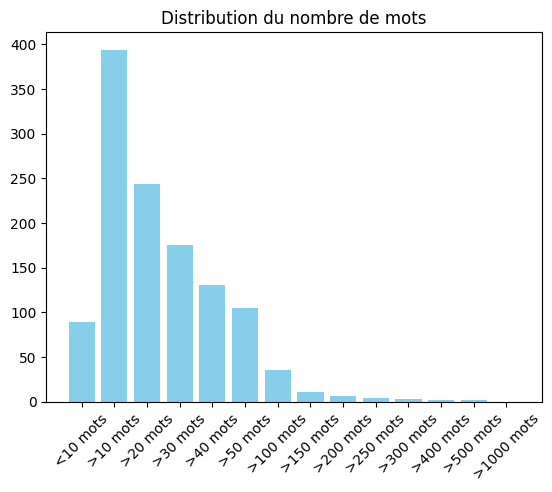

In [32]:
#Visualisation du résultat

taille = [
    "<10 mots", ">10 mots", ">20 mots", ">30 mots", ">40 mots", 
    ">50 mots", ">100 mots", ">150 mots", ">200 mots", ">250 mots", 
    ">300 mots", ">400 mots", ">500 mots", ">1000 mots"
]
valeurs = [
    CountInf10, CountSup10, CountSup20, CountSup30, CountSup40, 
    CountSup50, CountSup100, CountSup150, CountSup200, CountSup250, 
    CountSup300, CountSup400, CountSup500, CountSup1000
]

plt.bar(taille, valeurs, color='skyblue')
plt.title("Distribution du nombre de mots")
plt.xticks(rotation=45)
plt.show()

In [33]:
timesteps = 300

In [34]:
def fix_sentence_length(length,exemple):
    if len(exemple) > length:
        exemple = exemple[:length]
    elif len(exemple) < length:
        for i in range(length - len(exemple)):
            listzeros = [0] * 700
            exemple.append(listzeros)
    return exemple


In [35]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('frWac_postag_no_phrase_700_skip_cut50.bin', binary= True, unicode_errors= 'ignore')

In [36]:
List_of_Docs = []
for z,i in Documents :
    List_of_Docs.append(z)

In [37]:
mots_in_my_dict = {}
words = list(model.key_to_index)
for i,k in sac_de_mots.items() :
    string_with_substring = [string for string in words if i in string.split("_")]

    if len(string_with_substring) > 0 :
        mots_in_my_dict[string_with_substring[0].split("_")[0]] = model[string_with_substring[0]]

In [38]:
mots_in_my_dict.keys()

dict_keys(['remake', 'bel', 'hommage', 'visuel', 'vibrant', 'angleterre', 'campagnes', 'brumes', 'landes', 'brume', 'presque', 'factice', 'monstre', 'clairement', 'inspiré', 'saura', 'repousser', 'belle', 'intro', 'classieuse', 'superbe', 'johnston', 'réalisation', 'ample', 'jouant', 'parfaitement', 'magnifiques', 'décors', 'musique', 'également', 'adéquat', 'film', 'hollywoodien', 'vraiment', 'suggestif', 'scènes', 'transformation', 'détaillée', 'prouve', 'hideux', 'loup', 'garou', 'paris', 'numériques', 'avérer', 'extrêmement', 'photo', 'donne', 'impression', 'vieux', 'technicolor', 'délicat', 'redonner', 'naissance', 'mythe', 'connaitre', 'scénario', 'longue', 'partie', 'spectateurs', 'avance', 'rapport', 'histoire', 'manque', 'frousse', 'personnages', 'adéquation', 'folie', 'hopkins', 'extraordinaire', 'personnage', 'ambigu', 'habitude', 'aspect', 'légende', 'primer', 'science', 'mêle', 'immenses', 'possibilités', 'scène', 'sublime', 'révélation', 'twist', 'malédiction', 'écho', 's

In [39]:
def Sent_Embeding_sequence(words,Documents):
    X_SentsEmb = []
    y_SentsEmb = []
    #on va récuperer l'embeding de chaque sentence avec l'average des vecteur qui le compose
    for S,t in Documents: #S est la phrase , t est la classe
        Sent = []
        print(S,t)
        for m in mots_in_my_dict.keys():
            Sent = [list(mots_in_my_dict[m.lower()]) for m in S if m.lower() in mots_in_my_dict.keys()]
        Sent = fix_sentence_length(15,Sent)
        X_SentsEmb.append(Sent)
        y_SentsEmb.append(t)
        
    return X_SentsEmb,y_SentsEmb

In [40]:
X,Y = Sent_Embeding_sequence(mots_in_my_dict,Documents)

import numpy as np
X_a = np.array(X)
#print("X Shape", X_a.shape)

['remake', 'bel', 'hommage', 'visuel', 'vibrant', 'angleterre', 'victorienne', 'campagnes', 'brumes', 'landes', 'brume', 'presque', 'factice', 'monstre', 'clairement', 'inspiré', 'saura', 'repousser', 'avertis', 'belle', 'intro', 'classieuse', 'superbe', 'johnston', 'révèle', 'réalisation', 'ample', 'voluptueuse', 'jouant', 'parfaitement', 'symétries', 'magnifiques', 'décors', 'musique', 'également', 'hommage', 'adéquat', 'film', 'hollywoodien', 'vraiment', 'suggestif', 'scènes', 'abominations', 'commises', 'monstre', 'transformation', 'détaillée', 'prouve', 'hideux', 'loup', 'garou', 'paris', 'numériques', 'avérer', 'extrêmement', 'impressionnants', 'photo', 'donne', 'impression', 'vieux', 'technicolor', 'délicat', 'redonner', 'naissance', 'mythe', 'connaitre', 'scénario', 'ronronne', 'longue', 'partie', 'spectateurs', 'avance', 'rapport', 'histoire', 'manque', 'frousse', 'personnages', 'adéquation', 'folie', 'ambiante', 'hopkins', 'extraordinaire', 'personnage', 'ambigu', 'habitude',

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [42]:
print('length X_train : ', len(X_train))
print('length y_train :',len(y_train))
print('length X_test :',len(X_test))
print('length y_test :',len(y_test))
print('length X_val :',len(X_val))
print('length y_val :',len(y_val))

length X_train :  360
length y_train : 360
length X_test : 75
length y_test : 75
length X_val : 64
length y_val : 64


### Méthode par Batch

1er test avec 20 époques et un model loss : categorical_crossentropy:

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

embed_dim = 100
lstm_out = 100
num_classes = 10

modelBatch = Sequential() #le modèle est en séquence
# on ajoute les couches une par une :
modelBatch.add(LSTM(lstm_out, input_shape=(X_a.shape[1], X_a.shape[2])))
modelBatch.add(Dense(num_classes, activation='softmax')) # Couche de sortie pour multiclasse

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)

# Choisir la fonction de perte en fonction du format des labels
modelBatch.compile(loss='categorical_crossentropy',  # ou 'sparse_categorical_crossentropy' si labels en entiers
                   optimizer='adam',
                   metrics=['accuracy'])  # 'accuracy' pour multiclasse


print(modelBatch.summary())


c:\DATA\2024-2025\ESME\NLP\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,410 (1.23 MB)

 Trainable params: 321,410 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

None


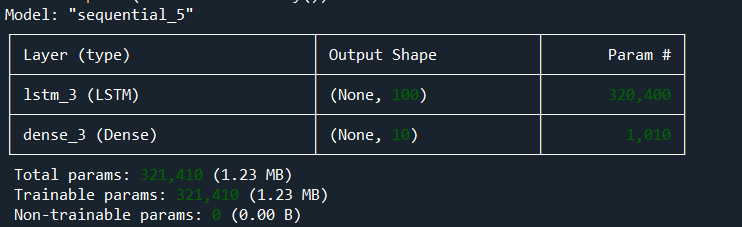

In [44]:
#à chaque epoque le nb d'erreur diminue, ca se precise

historyBatch = modelBatch.fit(X_train, y_train_one_hot, epochs = 20, validation_data=(X_val, y_val_one_hot))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2266 - loss: 2.1537 - val_accuracy: 0.2812 - val_loss: 1.7258
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3195 - loss: 1.7427 - val_accuracy: 0.2812 - val_loss: 1.6504
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3630 - loss: 1.5914 - val_accuracy: 0.4219 - val_loss: 1.5771
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3871 - loss: 1.5318 - val_accuracy: 0.3594 - val_loss: 1.5562
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4693 - loss: 1.3905 - val_accuracy: 0.4219 - val_loss: 1.4045
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5444 - loss: 1.2266 - val_accuracy: 0.4688 - val_loss: 1.3558
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6202 - loss: 1.0683 - val_accuracy: 0.4375 - val_loss: 1.3486
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7386 - loss: 0.8992 - val_accuracy: 0.4844 - val_loss

In [45]:
scoreBatch = modelBatch.predict(X_val)
predicted_val = []

for i in scoreBatch :
    predicted_val.append(round(i[0]))

count_true = 0
for i,j in zip(y_val, predicted_val) : 
    if i == j :
        count_true = count_true + 1


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


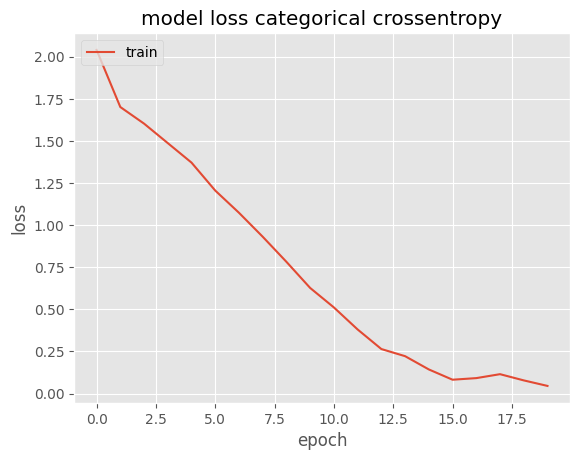

In [46]:
#visualisation

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(historyBatch.history['loss'])
plt.title('model loss categorical crossentropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

2ème :(mini batch), On met 20 époques, et un model loss de type mean_squared_error

In [47]:
lstm_out = 100
batch_size = 128
num_classes = 10

model = Sequential() 
model.add(LSTM(lstm_out, input_shape=(X_a.shape[1], X_a.shape[2])))
model.add(Dense(num_classes,activation='sigmoid')) 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy']) 
print(modelBatch.summary())

history128 = model.fit(X_train,y_train_one_hot, batch_size = batch_size, epochs = 20,validation_data=(X_val, y_val_one_hot))

c:\DATA\2024-2025\ESME\NLP\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 964,232 (3.68 MB)

 Trainable params: 321,410 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 642,822 (2.45 MB)

None
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - binary_accuracy: 0.7589 - loss: 0.2358 - val_binary_accuracy: 0.9000 - val_loss: 0.2010
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.9000 - loss: 0.1864 - val_binary_accuracy: 0.9000 - val_loss: 0.1437
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - binary_accuracy: 0.9000 - loss: 0.1273 - val_binary_accuracy: 0.9000 - val_loss: 0.0978
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 0.9000 - loss: 0.0910 - val_binary_accuracy: 0.9000 - val_loss: 0.0837
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - binary_accuracy: 0.9000 - loss: 0.0831 - val_binary_accuracy: 0.9000 - val_loss: 0.0804
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - binary_accuracy: 0.9000 - loss: 0.0810 - val_binary_accuracy: 0.9000 - val_loss: 0.0790
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - binary_accuracy: 0.9000 - loss: 0.0800 - val_binary_accuracy: 0.9000 - val_loss: 0.0787
Epoch 8/20
3/3 ━━━━━━

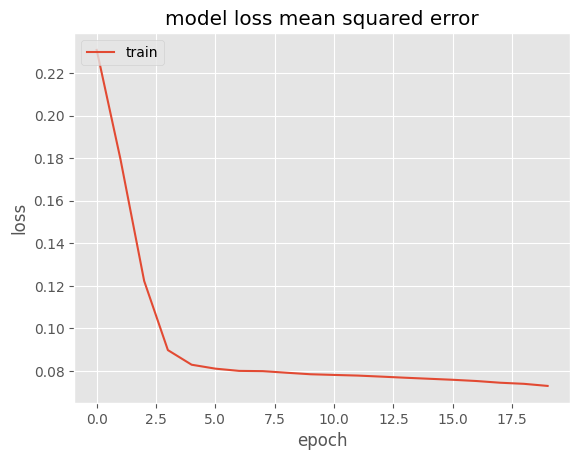

In [48]:
#visualisation

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(history128.history['loss'])
plt.title('model loss mean squared error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

3ème : on change le nombre d'époque à 20 et le modèle loss est de type binary_crossentropy

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,410 (1.23 MB)

 Trainable params: 321,410 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - binary_crossentropy: 0.6812 - loss: 0.6812 - val_binary_crossentropy: 0.6187 - val_loss: 0.6187
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_crossentropy: 0.5953 - loss: 0.5953 - val_binary_crossentropy: 0.5083 - val_loss: 0.5083
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_crossentropy: 0.4734 - loss: 0.4734 - val_binary_crossentropy: 0.3740 - val_loss: 0.3740
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_crossentropy: 0.3451 - loss: 0.3451 - val_binary_crossentropy: 0.2965 - val_loss: 0.2965
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_crossentropy: 0.2880 - loss: 0.2880 - val_binary_crossentropy: 0.2717 - val_loss: 0.2717
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_crossentropy: 0.2736 - loss: 0.2736 - val_binary_crossentropy: 0.2629 - val_loss: 0.2629
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_crossentropy: 0.2664 - loss: 0.2664 - val_binary_cross

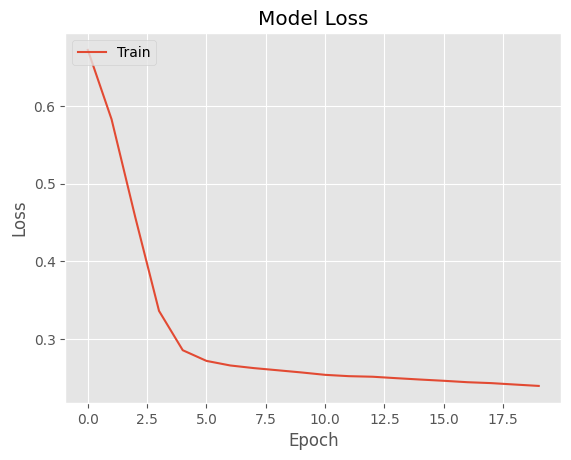

In [50]:

lstm_out = 100
batch_size = 128
num_classes = 10  

# Création du modèle
modelBatch = Sequential()
modelBatch.add(LSTM(lstm_out, input_shape=(X_a.shape[1], X_a.shape[2])))
modelBatch.add(Dense(num_classes, activation='softmax'))  # Utilisation de sigmoid pour la sortie

# Compilation du modèle
modelBatch.compile(loss='binary_crossentropy',  # Fonction de perte pour MSE
                   optimizer='adam',
                   metrics=['binary_crossentropy'])  # Utiliser MSE comme métrique

# Afficher le résumé du modèle
print(modelBatch.summary())

# Entraînement du modèle
historyBatch = modelBatch.fit(X_train, y_train_one_hot, 
                               epochs=20, 
                               batch_size=batch_size,
                               validation_data=(X_val, y_val_one_hot))


# Visualisation de la courbe de perte
plt.style.use('ggplot')
plt.plot(historyBatch.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

4eme : avec model loss categorical_crossentropy

In [51]:
lstm_out = 100
batch_size = 128
num_classes = 10

model3L = Sequential()
model3L.add(LSTM(lstm_out,return_sequences=True, input_shape=(X_a.shape[1], X_a.shape[2])))
model3L.add(LSTM(32, return_sequences=True))  
model3L.add(LSTM(32))  
model3L.add(Dense(num_classes,activation='sigmoid'))
model3L.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(model3L.summary())
history128_3Layer = model3L.fit(X_train, y_train_one_hot, 
                                 validation_data=(X_val, y_val_one_hot), 
                                 batch_size=batch_size, 
                                 epochs=20)

c:\DATA\2024-2025\ESME\NLP\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 15, 100)        │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 15, 32)         │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,074 (1.32 MB)

 Trainable params: 346,074 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - binary_accuracy: 0.6416 - loss: 0.2444 - val_binary_accuracy: 0.8906 - val_loss: 0.2170
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.8986 - loss: 0.2073 - val_binary_accuracy: 0.9000 - val_loss: 0.1703
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - binary_accuracy: 0.9000 - loss: 0.1614 - val_binary_accuracy: 0.9000 - val_loss: 0.1341
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - binary_accuracy: 0.9000 - loss: 0.1304 - val_binary_accuracy: 0.9000 - val_loss: 0.1141
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.9000 - loss: 0.1126 - val_binary_accuracy: 0.9000 - val_loss: 0.1019
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.9000 - loss: 0.1014 - val_binary_accuracy: 0.9000 - val_loss: 0.0941
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - binary_accuracy: 0.9000 - loss: 0.0936 - val_binary_accuracy: 0.9000 - val_loss: 0.0892
Epoch 8/20
3/3 ━━━━━━

In [52]:
count_true/len(y_val) #pour 20 epochs et sequential_5

0.015625

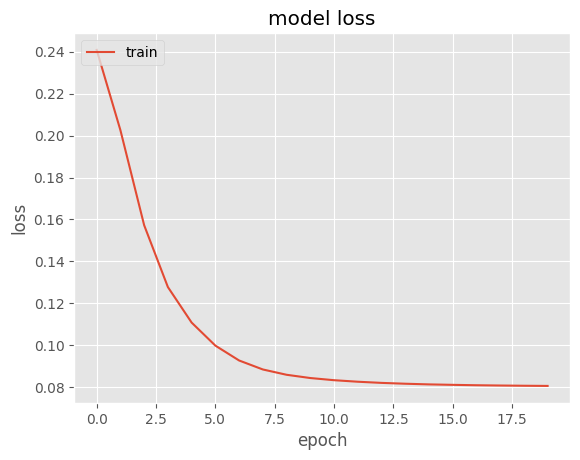

In [53]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(history128_3Layer.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


Afin de déterminer le meilleur modèle, nous regardons la vitesse de convergence, la valeur finale ainsi que la stabilité du modèle.

Le meilleur modèle est le deuxième avec 20 époques et un modèle mean_squarred_error. 

    Pour le premier modèle, on se rend compte que la pente se rapproche de 0 tardivement vers la 15ème époque. De plus, la pente ne parait pas stable car elle a des "piques". Ce modèle ne semble pas optimal. De plus la pente commence vers 2.
    Pour le 2ème modèle, on remarque que la pente débute vers 0.2 et se stabilise rapidement vers 0.05 au bout de 3/4 époques. La courbe semble assez stable.
    Pour le 3ème modèle, le pente débute vers 0.6 et se stabilise vers 0.2 au bout de 5 époques. La courbe se stabilise assez rapidement.
    Pour le 4ème modèle, la pente débute vers 0.24 et atteint 0.08 au bout de la 15ème époque, ce qui est tardif mais la pente parait plus linéaire au cours de sa descente.

En conclusion, la meilleure méthode est la deuxième. Ce modèle atteint rapidement une perte stable et faible de 0.05 dès les premières époques et arrive à se stabiliser de manière efficace.
   